# Análise de preço de Programadores


In [1]:
#Carregamento de dados
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv('Dataset salary 2024.csv')

# Análise exploratória dos dados

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
dataset.shape

(16534, 11)

In [4]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [6]:
# Precismos converter a coluna work_year para o tipo datetime, experience level precisamos fazer engenharia de atributos para classificar por numeros e colocar um dicionario na visualização de dados
#salary precisamos converter para float, precisamos ver um unique do salary currency, emplyee residence, company size vamos fazer engenharia de atributos tambem


In [7]:
dataset['salary'] = dataset['salary'].astype(float)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           16534 non-null  int64  
 1   experience_level    16534 non-null  object 
 2   employment_type     16534 non-null  object 
 3   job_title           16534 non-null  object 
 4   salary              16534 non-null  float64
 5   salary_currency     16534 non-null  object 
 6   salary_in_usd       16534 non-null  int64  
 7   employee_residence  16534 non-null  object 
 8   remote_ratio        16534 non-null  int64  
 9   company_location    16534 non-null  object 
 10  company_size        16534 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           16534 non-null  int64  
 1   experience_level    16534 non-null  object 
 2   employment_type     16534 non-null  object 
 3   job_title           16534 non-null  object 
 4   salary              16534 non-null  float64
 5   salary_currency     16534 non-null  object 
 6   salary_in_usd       16534 non-null  int64  
 7   employee_residence  16534 non-null  object 
 8   remote_ratio        16534 non-null  int64  
 9   company_location    16534 non-null  object 
 10  company_size        16534 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB


In [9]:
counts = dataset['salary_currency'].value_counts()

# Imprima os resultados
print(counts)


salary_currency
USD    15294
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
DKK        4
JPY        4
TRY        3
HUF        3
ILS        2
NOK        2
THB        2
NZD        1
PHP        1
ZAR        1
HKD        1
MXN        1
CLP        1
Name: count, dtype: int64


In [10]:
counts.describe()


count       23.000000
mean       718.869565
std       3180.967910
min          1.000000
25%          1.500000
50%          4.000000
75%         10.000000
max      15294.000000
Name: count, dtype: float64

In [11]:
dataset_drop = dataset[dataset['salary_currency'].isin(['USD', 'GBP'])]
dataset_drop

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730.0,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118.0,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500.0,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000.0,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000.0,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16528,2021,SE,FT,Data Specialist,165000.0,USD,165000,US,100,US,L
16529,2020,SE,FT,Data Scientist,412000.0,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000.0,USD,105000,US,100,US,S


In [14]:
dataset_drop = dataset_drop.drop(columns = ['salary'], axis = 1)

In [15]:
dataset_drop=dataset_drop.drop(columns = ['salary_currency'], axis = 1)

In [16]:
dataset_drop

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
16528,2021,SE,FT,Data Specialist,165000,US,100,US,L
16529,2020,SE,FT,Data Scientist,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,US,100,US,S


In [19]:
counts1 = dataset_drop['remote_ratio'].value_counts()
print (counts1)

remote_ratio
0      10886
100     4925
50        99
Name: count, dtype: int64


## Engenharia de Atributos


In [22]:
dataset_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15910 entries, 0 to 16532
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           15910 non-null  int64 
 1   experience_level    15910 non-null  object
 2   employment_type     15910 non-null  object
 3   job_title           15910 non-null  object
 4   salary_in_usd       15910 non-null  int64 
 5   employee_residence  15910 non-null  object
 6   remote_ratio        15910 non-null  int64 
 7   company_location    15910 non-null  object
 8   company_size        15910 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [24]:
dataset_drop.isnull().count()


work_year             15910
experience_level      15910
employment_type       15910
job_title             15910
salary_in_usd         15910
employee_residence    15910
remote_ratio          15910
company_location      15910
company_size          15910
dtype: int64

In [27]:
# Use a função replace para substituir os valores
dataset_drop['remote_ratio'] = dataset_drop['remote_ratio'].replace({0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'})


In [28]:
dataset_drop

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,presencial,US,M
1,2024,SE,FT,AI Engineer,92118,US,presencial,US,M
2,2024,SE,FT,Data Engineer,130500,US,presencial,US,M
3,2024,SE,FT,Data Engineer,96000,US,presencial,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,presencial,US,M
...,...,...,...,...,...,...,...,...,...
16528,2021,SE,FT,Data Specialist,165000,US,remoto,US,L
16529,2020,SE,FT,Data Scientist,412000,US,remoto,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,US,remoto,US,L
16531,2020,EN,FT,Data Scientist,105000,US,remoto,US,S


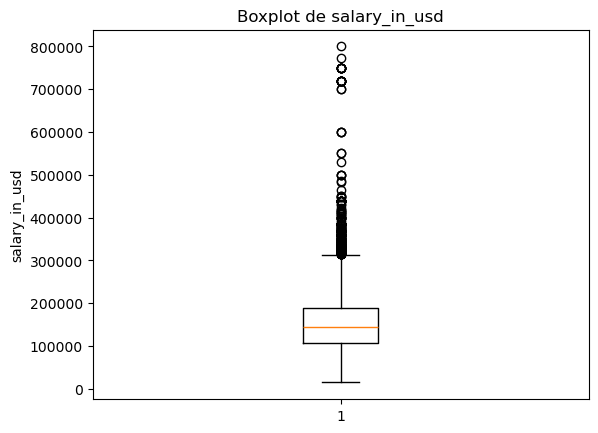

In [30]:
plt.boxplot(dataset_drop['salary_in_usd'])
plt.title('Boxplot de salary_in_usd')
plt.ylabel('salary_in_usd')

# Mostrar o gráfico
plt.show()